In [1]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import model_from_json
from keras.utils import multi_gpu_model 
from keras.utils import to_categorical


Using TensorFlow backend.


Read the data
===========

In [4]:
x_original=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
y_original=pd.read_csv('../_targelable4_withNa_AllColumns.txt')


In [5]:

x=x_original[['Unnamed: 0','L103000', 'L101700', 'L103100', 'L102900', 'L100800', 'S000300', 'S001200', 
                       'S000200', 'L100700', 'L101300', 'L190000', 'S000502', 'S000501', 'AGE', 'L100300', 'L190400', 
                       'L100100', 'L190800', 'L101000', 'L190300', 'L101600','SEX','FIELD_17','FIELD_22','FIELD_24',
'FIELD_33', 'FIELD_38', 'FIELD_31', 'FIELD_40', 'FIELD_41', 'FIELD_42', 'FIELD_29', 'FIELD_27', 'FIELD_28', 'FIELD_25', 
                       'FIELD_32', 'FIELD_4', 'FIELD_21', 'FIELD_19', 'FIELD_26', 'FIELD_18', 'FIELD_14', 'FIELD_13', 
                       'FIELD_20', 'FIELD_15', 'FIELD_16']]

y=y_original[['Unnamed: 0','L103000', ]]

print(x_original.shape)
print(y_original.shape)

(159381, 408)
(159381, 408)


Prepare the data
============

In [6]:
data= pd.merge(x,y, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data=data.dropna(). reset_index()

data=data[data.FIELD_15!=1]
data=data[data.FIELD_17!=1]
data=data[data.FIELD_22!=1]
data=data[data.FIELD_24!=1]

print(data.shape)

(137067, 49)


In [ ]:
print(data.shape)
print(data.columns)
data.head()

Check the correlation of the selected feature with the independent variables
=====

In [ ]:
temppd=pd.DataFrame(data.copy())
temppd['y']=data.L103000_y
temppd.head()
corval=abs(temppd.corr()).sort_values(by='y', ascending=False)

In [ ]:
corval.y[:25].index

In [ ]:
#histogram plot of the features
# import matplotlib.pyplot as plt
# x[x.dtypes[(x.dtypes=="float64")|(x.dtypes=="int64")]
#                         .index.values].hist(figsize=[11,11])

In [ ]:
data=data.dropna()

In [7]:
y=data[['L103000_y']]

# x=data[['L103000_x', 'L103100', 'L100700', 'S000200',
#        'L101700', 'S000300', 'S001200', 'SEX', 'L190400', 'FIELD_33',
#        'L100800', 'L190300', 'L102900', 'L101300', 'S000501', 'S000502',
#        'L190000', 'L190800', 'L101600', 'FIELD_38', 'AGE', 'L100100',
#        'FIELD_32']]
x=data[['L103000_x', 'L101700', 'L103100', 'L102900', 'L100800', 'S000300', 'S001200', 
                       'S000200', 'L100700', 'L101300', 'L190000', 'S000502', 'S000501', 'AGE', 'L100300', 'L190400', 
                       'L100100', 'L190800', 'L101000', 'L190300', 'L101600','SEX','FIELD_17','FIELD_22','FIELD_24',
'FIELD_33', 'FIELD_38', 'FIELD_31', 'FIELD_40', 'FIELD_41', 'FIELD_42', 'FIELD_29', 'FIELD_27', 'FIELD_28', 'FIELD_25', 
                       'FIELD_32', 'FIELD_4', 'FIELD_21', 'FIELD_19', 'FIELD_26', 'FIELD_18', 'FIELD_14', 'FIELD_13', 
                       'FIELD_20', 'FIELD_15', 'FIELD_16']]

In [8]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]

In [ ]:
fit.transform(x)

In [ ]:
for i in x.columns:
#     x[i]=np.power(x[i],0.005)
    plt.title(i)
    plt.scatter(x[i],y)
    plt.show()
    plt.hist(x[i],bins=50)
    plt.show()

In [ ]:
x.columns

In [ ]:
x.S000502=np.log10(x.S000502)

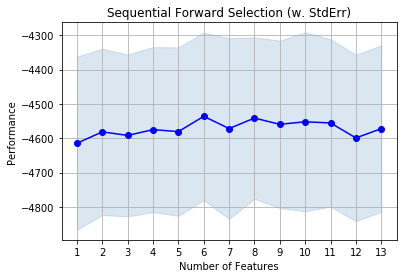

In [14]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

lr = RandomForestRegressor()

sfs = SFS(lr, 
          k_features=13, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(x, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [15]:
x=sfs.transform(x)
print(sfs.k_feature_names_)
print(sfs.k_feature_idx_)
x

('L103000_x', 'SEX', 'FIELD_17', 'FIELD_22', 'FIELD_24', 'FIELD_21', 'FIELD_19', 'FIELD_26', 'FIELD_14', 'FIELD_13', 'FIELD_20', 'FIELD_15', 'FIELD_16')
(0, 21, 22, 23, 24, 37, 38, 39, 41, 42, 43, 44, 45)


array([[ 53.,   1.,   0., ...,   0.,   0.,   0.],
       [ 53.,   1.,   0., ...,   0.,   0.,   0.],
       [ 41.,   1.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 76.,   1.,   0., ...,   0.,   0.,   0.],
       [ 47.,   1.,   0., ...,   0.,   0.,   0.],
       [100.,   1.,   0., ...,   0.,   0.,   0.]])

Apply PCA
===========

In [16]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=8)
# pca.fit(x)

# print(pca.explained_variance_ratio_)   
# print(np.sum(pca.explained_variance_ratio_))

# x=pca.fit_transform(x) 
# print(x.shape)


feature scaling
=======

In [17]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()  #StandardScaler()
# x = min_max_scaler.fit_transform(x)

clustring test
==========

In [18]:
# from sklearn.cluster import KMeans
# from scipy.spatial.distance import cdist

# K = range(1,10)
# distortions = []

# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(x)
#     kmeanModel.fit(x)
#     distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# # Plot the elbow
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()


In [19]:
# kmeanModel = KMeans(n_clusters=k).fit(x)
# x['lbl']=kmeanModel.labels_ 

In [24]:
x.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Random Forest Regressor
=============

In [21]:
ylable=y[['L103000_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [22]:
regr = RandomForestRegressor(max_depth=7, random_state=0,verbose =0,n_estimators=200)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)


[9.83306511e-01 1.53237822e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.78931146e-04 4.16832269e-04 2.51561957e-04
 3.11142702e-04 8.81838964e-05 2.30552500e-05 0.00000000e+00
 0.00000000e+00]


mean_squared_error 4739.325350536308
root mean_squared_error 68.84275815607846
mean_absolute_error 38.690059100925765
r2_score 0.47002382783641306


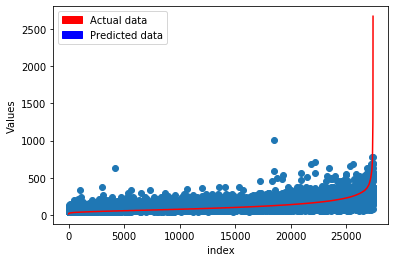

,t + 1,pred (t +1)
9963,1328.0,197.194569
579,1352.0,178.350071
10137,1449.0,575.681048
7057,1593.0,364.111661
13537,1934.0,369.666996
4500,2043.0,268.458462
20235,2269.0,560.135979
7255,2318.0,687.707097
17872,2423.0,779.319754
17823,2673.0,289.123140


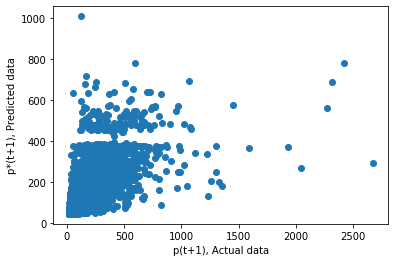

In [23]:

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.tail(10)

In [12]:
# tempdata=pd.DataFrame(xtest.copy())
# tempdata['ytest']=ytest
# # temp=temp.dropna()
# # tempdata.head()
# # tempdata[tempdata.ytest.isna()].index

# tempdata=tempdata.drop(tempdata[tempdata.ytest.isna()].index)


xg boost
==========

In [ ]:
import xgboost as xgb
# from sklearn.metrics import mean_squared_error
# import pandas as pd
# import numpy as np

In [ ]:
xg_reg = xgb.XGBRegressor()
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
#                           learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(xtrain, ytrain) 

In [ ]:

ypred = xg_reg.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

# ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
# ypredPD['t + 1']=ytest.values
# ypredPD['pred (t +1)']=ypred
# ypredPD.head(10)

In [ ]:
# ytest[ytest.isna()].shape
# tempdata.iloc[:,-1]

ANN
==========

In [ ]:
model= Sequential()
model.add(Dense(input_dim=32,units=128,activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=128, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=1, kernel_initializer='uniform'))
model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mean_squared_error' ])

In [ ]:
h=model.fit(xtrain, ytrain, validation_split=.2,epochs=100, batch_size=50)

In [ ]:
ypred=model.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

In [ ]:
history=h
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
ypredPD['diff']=abs(ypredPD['t + 1']- ypredPD['pred (t +1)'])
print(np.mean(ypredPD['diff']))
print(np.std(ypredPD['diff']))
print(100*ypredPD[ypredPD['diff']<=5].shape[0]/ypredPD.shape[0])

In [ ]:

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.head(10)

SVR
======

In [ ]:
from sklearn.svm import SVR
# svr_rbf = SVR(kernel='rbf', C=10, gamma=0.02, epsilon=.001)
svr_rbf = SVR(kernel='rbf')

In [ ]:
svr_rbf.fit(xtrain, ytrain) 

In [ ]:
ypred=svr_rbf.predict(xtest)

In [ ]:
import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)